# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2023/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday September 26th, 2023 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/

The assignment should be handed in as a group. To do this, all group members must register for peergrade individually. See how to hand in as a group here: https://help.peergrade.io/en/articles/69783-how-to-submit-as-a-group .

(If you haven't set up an account on peergrade yet, go to www.peergrade.io/join and type in the class code: ***DPZEV6***.)

# Part 1: Binning degree distributions


* Binning real numbers
  * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
  * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
  * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# Generate 5000 data points from a Gaussian distribution
mu = 2
sigma = 0.125
points = []
for i in range(5000): 
    temp = random.gauss(mu, sigma) 
    points.append(temp)

In [3]:
# Bin those number into 10 bins
hist_values, bin_edges = np.histogram(points, bins=10)
hist_values, bin_edges

(array([   2,   18,  117,  513, 1149, 1489, 1163,  425,  105,   19]),
 array([1.4705209 , 1.56828552, 1.66605014, 1.76381475, 1.86157937,
        1.95934399, 2.0571086 , 2.15487322, 2.25263784, 2.35040246,
        2.44816707]))

In [4]:
len(hist_values) == len(bin_edges)

False

The numpy function returns 2 elements: array with values of the histogram and array with bin edges.

They don't have the same length - there is always N + 1 number od edges, where N is number of bins.

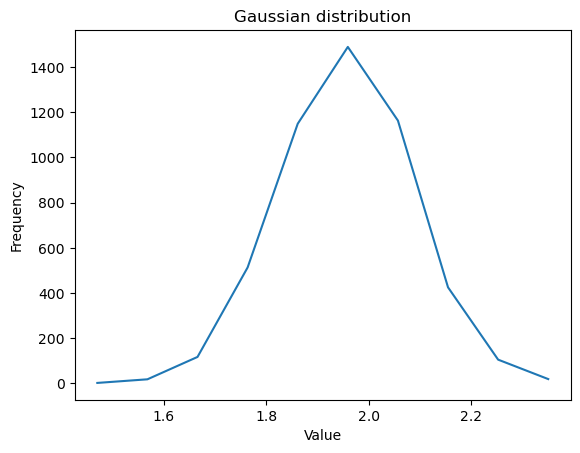

In [5]:
# Use matplotlib.pyplot.plot to plot the binned data
plt.plot(bin_edges[:-1], hist_values)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Gaussian distribution')
plt.show()

* Binning integers
  * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
  * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.
  * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 

In [6]:
# Use numpy.random.poisson and find the maximum and minimum value of your 5000 random numbers.
poisson_points = np.random.poisson(10, 5000)
minimum = min(poisson_points)
maximum = max(poisson_points)
print(f'Maximum is {maximum} and minimum is {minimum}.')

Maximum is 24 and minimum is 0.


In [7]:
# Create v vector
v = np.arange(minimum, maximum + 1)

In [8]:
# What is the sum over bin counts?
hist_values, bin_edges = np.histogram(poisson_points, bins=v)
bin_sum = np.sum(hist_values)
print(f"Sum over bin counts is {bin_sum}.")

Sum over bin counts is 5000.


- Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.

They are meant to match min and max values of Poisson distribution so entire range of values is included on the histogram.

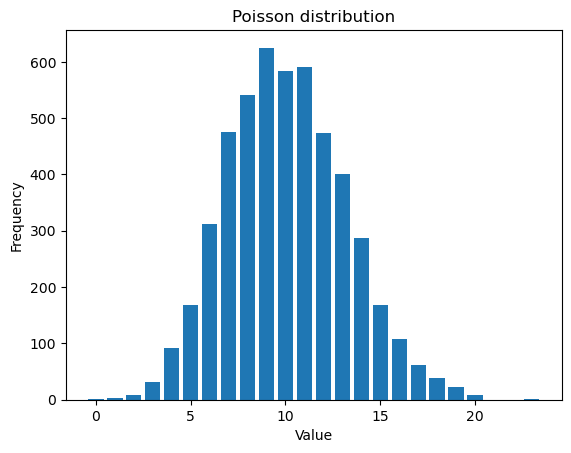

In [9]:
# Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 
plt.bar(v[:-1], hist_values)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Poisson distribution')
plt.show()

* Binning and plotting degree distributions. 
  * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
**Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
  * Now, use `networkx` to create the graph and extract the degree distribution.
  * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

Given the following, we can easily calculate $p$ to match Poisson distribution with $\lambda$ = 10

$\langle k \rangle = p (N-1)$

10 = $p (4999)$

p = $10/4999 = 0,002$

In [10]:
# Generate ER network
ER = nx.erdos_renyi_graph(5000, 0.002)
degree_sequence = sorted((d for n, d in ER.degree()), reverse=True)
er_hist, edges = np.histogram(degree_sequence, bins=range(min(degree_sequence), max(degree_sequence) + 1))

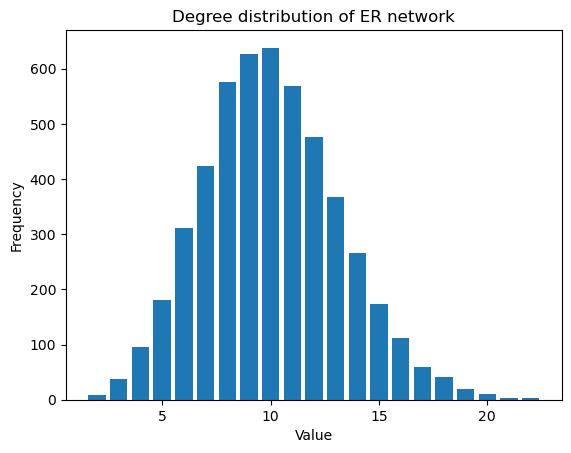

In [11]:
# Create a nice bar plot
plt.bar(edges[:-1], er_hist)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Degree distribution of ER network')
plt.show()

# **Part 2, Random networks and plotting in networkx**

**Erdős-Rényi Networks Consider an Erdős-Rényi network with N = 3,000 nodes, connected to each other with probability 10^(-3).**

In [13]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

# Defining the number of nodes (N) and the probability (p)
N = 3000
p = 10**(-3)

# Creating the Erdős-Rényi network
G = nx.erdos_renyi_graph(N, p)

**What is the expected number of links, 〈L〉?**

According to Erdős-Rényi (ER) random graph with N nodes and edge probability p, the expected number of links 〈L〉 can be calculated using the following formula:

〈L〉 = (N(N-1) / 2) * p

In our case, we have N = 3,000 nodes and p = 10^(-3). We Can plug these values into the formula:

〈L〉 = (3,000 * (3,000 - 1) / 2) * (10^(-3))

Calculating this gives the following:

〈L〉 = (3,000 * 2,999 / 2) * (10^(-3))

〈L〉 = (4,498,500 / 2) * (10^(-3))

〈L〉 = 2,249,250 * (10^(-3))

〈L〉 = 2,249.25

**In which regime is the network?**

In our case, we have N = 3,000 nodes and p = 10^(-3). To determine the regime, we can calculate the average degree using the formula below:

Average Degree (k) = N * p

Average Degree (k) = 3,000 * 10^(-3) = 3

Since the average degree (k) is 3, our network falls into the supercritical regime because p (the edge probability) is greater than 1/N, and the network is relatively dense with a significant giant connected component.

**Calculate the probability pc so that the network is at the critical point.**

To find the critical probability (Pc) at which the Erdős-Rényi (ER) network reaches the critical point, we can use the formula for the critical point, which is:

pc = 1 / N

In our case, N = 3,000, so:

pc = 1 / 3,000 = 0.0003333 (approximately)

So, the critical probability (pc) for our ER network to be at the critical point is approximately 0.0003333.

**Calculate the probability pc so that the network is at the critical point
Given the linking probability p = 10–3, calculate the number of nodes Ncr so that the network has only one component.**

Given a linking probability (p) of 10^(-3), we want to calculate the number of nodes (N_cr) at which the network has only one component (it's at the critical point). The critical probability (p_c) for the emergence of the giant connected component (GCC) in an Erdős-Rényi (ER) random graph is given by:

p_c = 1 / N_cr

We have p = 10^(-3). To find N_cr, we can use the formula:

10^(-3) = 1 / N_cr

Now, we solve for N_cr:

N_cr = 1 / (10^(-3))
N_cr = 1,000

So, if we want the network to have only one component at a linking probability of 10^(-3), we would need a network size (number of nodes) of 1,000 (N_cr).







**For the network in (d), calculate the average degree 〈kcr〉 and the average distance between two randomly chosen nodes 〈d〉.**

In order to calculate the average degree 〈k_cr〉 and the average distance between two randomly chosen nodes 〈d〉 for a network with N_cr nodes (1,000 nodes in this case) at the critical point (p = 10^(-3)), we can use the following formulas:

Average Degree 〈k_cr〉:

In an Erdős-Rényi (ER) random graph at the critical point, 〈k_cr〉 can be approximated as:

〈k_cr〉 = 2 * ln(N_cr)

Average Distance 〈d〉:

The average distance between two randomly chosen nodes 〈d〉 in an ER random graph at the critical point is related to the

natural logarithm of N_cr:

〈d〉 ≈ ln(N_cr)

Given N_cr = 1,000:

Average Degree 〈k_cr〉:

〈k_cr〉 = 2 * ln(1,000) = 2 * 6.9078 ≈ 13.8156

Average Distance 〈d〉:

〈d〉 ≈ ln(1,000) = 6.9078

So, at the critical point with 1,000 nodes (N_cr) and a linking probability of 10^(-3) (p), the average degree 〈k_cr〉 is approximately 13.8156, and the average distance between two randomly chosen nodes 〈d〉 is approximately 6.9078.

**Calculate the degree distribution pk of this network (approximate with a Poisson degree distribution).**

To approximate the degree distribution pk of an Erdős-Rényi (ER) network at the critical point (p = 10^(-3)), we can use the Poisson degree distribution. The Poisson degree distribution is appropriate for ER networks when p is small and N is large.

The Poisson degree distribution has the form:

pk = (e^(-λ) * λ^k) / k!

Where:

pk is the probability that a node has degree k.
λ (lambda) is the average degree.
In this case, we've calculated the average degree 〈k_cr〉 to be approximately 13.8156.

Now, we can calculate the Poisson degree distribution for various values of k:

In [4]:
import math

# Average degree at the critical point
lambda_k_cr = 13.8156

# Define a function to calculate the Poisson degree distribution pk for a given k
def poisson_degree_distribution(k, lambda_k):
    return (math.exp(-lambda_k) * lambda_k**k) / math.factorial(k)

# Calculate and print the Poisson degree distribution for k = 0 to 30 (or any desired range)
for k in range(31):
    pk = poisson_degree_distribution(k, lambda_k_cr)
    print(f'Poisson degree distribution for k={k}: {pk:.6f}')


Poisson degree distribution for k=0: 0.000001
Poisson degree distribution for k=1: 0.000014
Poisson degree distribution for k=2: 0.000095
Poisson degree distribution for k=3: 0.000439
Poisson degree distribution for k=4: 0.001518
Poisson degree distribution for k=5: 0.004194
Poisson degree distribution for k=6: 0.009657
Poisson degree distribution for k=7: 0.019060
Poisson degree distribution for k=8: 0.032915
Poisson degree distribution for k=9: 0.050527
Poisson degree distribution for k=10: 0.069806
Poisson degree distribution for k=11: 0.087674
Poisson degree distribution for k=12: 0.100940
Poisson degree distribution for k=13: 0.107272
Poisson degree distribution for k=14: 0.105859
Poisson degree distribution for k=15: 0.097501
Poisson degree distribution for k=16: 0.084189
Poisson degree distribution for k=17: 0.068419
Poisson degree distribution for k=18: 0.052514
Poisson degree distribution for k=19: 0.038185
Poisson degree distribution for k=20: 0.026377
Poisson degree distribu

**Plot a random network with 200 nodes and an average degree of 1.5. (I suggest using networkx.draw and reading the documentation carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).**

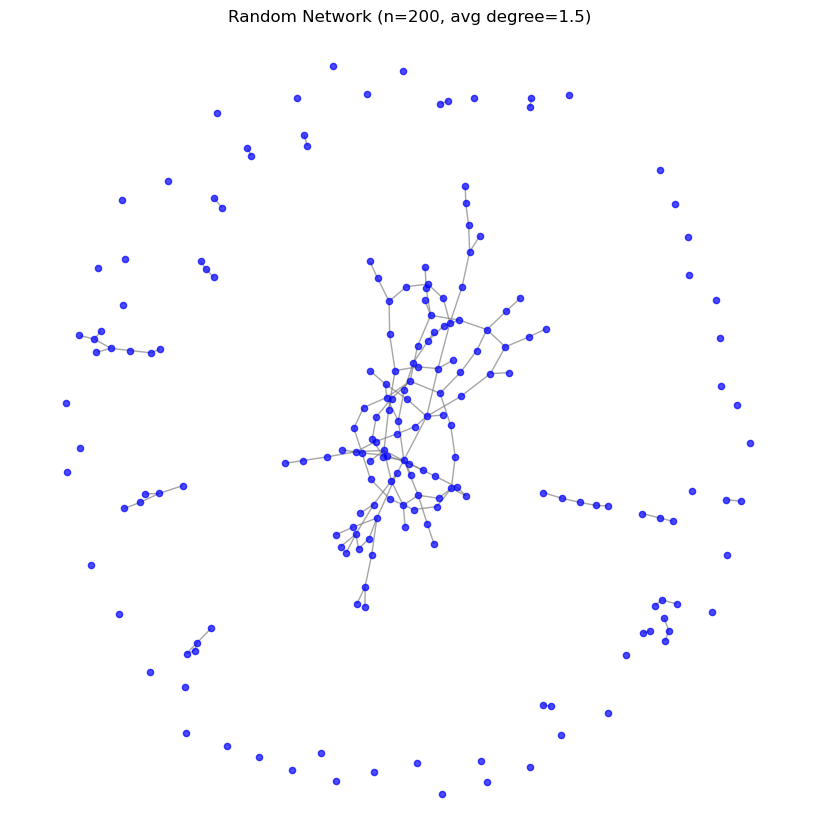

In [5]:

# Creating the random network with 200 nodes and an average degree of 1.5
n = 200
avg_degree = 1.5
G = nx.erdos_renyi_graph(n, avg_degree / n)

# Defining node positions using a spring layout
pos = nx.spring_layout(G, seed=42)

# Drawing the network, adjusting node size for better visibility
plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_size=20, with_labels=False, node_color='b', edge_color='gray', alpha=0.7)

plt.title(f"Random Network (n={n}, avg degree={avg_degree})")
plt.axis('off')  # Turn off axis labels
plt.show()


**Extract the Giant Connected Component, GCC. (Hint. You can use networkx.connected_component_subgraphs)**

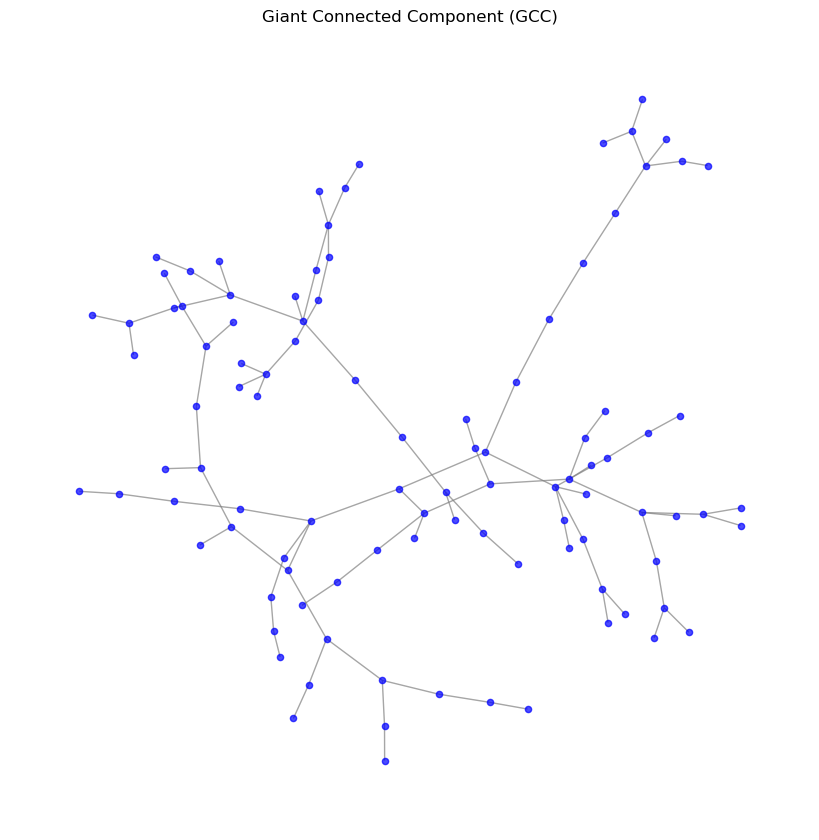

In [6]:


# Creating the random network with 200 nodes and an average degree of 1.5
n = 200
avg_degree = 1.5
G = nx.erdos_renyi_graph(n, avg_degree / n)

# Finding all connected components as separate graphs
connected_components = list(nx.connected_components(G))

# Identifying the Giant Connected Component (GCC)
gcc_nodes = max(connected_components, key=len)
gcc = G.subgraph(gcc_nodes)

# Drawing the GCC
pos = nx.spring_layout(gcc, seed=42)
plt.figure(figsize=(8, 8))
nx.draw(gcc, pos, node_size=20, with_labels=False, node_color='b', edge_color='gray', alpha=0.7)
plt.title("Giant Connected Component (GCC)")
plt.axis('off')
plt.show()

# We can also access information about the GCC, e.g., its size:
##gcc_size = len(gcc.nodes())
##print(f"Size of GCC: {gcc_size} nodes")


**Choose a node at random from the GCC. (Hint: You may want to try random.choice.)**

In [7]:
import random

# Create the random network with 200 nodes and an average degree of 1.5
n = 200
avg_degree = 1.5
G = nx.erdos_renyi_graph(n, avg_degree / n)

# Find all connected components as separate graphs
connected_components = list(nx.connected_components(G))

# Identify the Giant Connected Component (GCC)
gcc_nodes = max(connected_components, key=len)
gcc = G.subgraph(gcc_nodes)

# Choose a random node from the GCC
random_node = random.choice(list(gcc.nodes()))

# Print the randomly chosen node
print("Randomly chosen node from the GCC:", random_node)

Randomly chosen node from the GCC: 3


**Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest networkx.single_source_shortest_path_length)**

In [8]:
# Create the random network with 200 nodes and an average degree of 1.5
n = 200
avg_degree = 1.5
G = nx.erdos_renyi_graph(n, avg_degree / n)

# Find all connected components as separate graphs
connected_components = list(nx.connected_components(G))

# Identify the Giant Connected Component (GCC)
gcc_nodes = max(connected_components, key=len)
gcc = G.subgraph(gcc_nodes)

# Choose a random node from the GCC
random_node = random.choice(list(gcc.nodes()))

# Find all nodes that are precisely 2 steps away from the random node
nodes_2_steps_away = [node for node, distance in nx.single_source_shortest_path_length(gcc, random_node).items() if distance == 2]

# Print the nodes that are 2 steps away
print("Nodes 2 steps away from the random node:", nodes_2_steps_away)

Nodes 2 steps away from the random node: [40, 95]


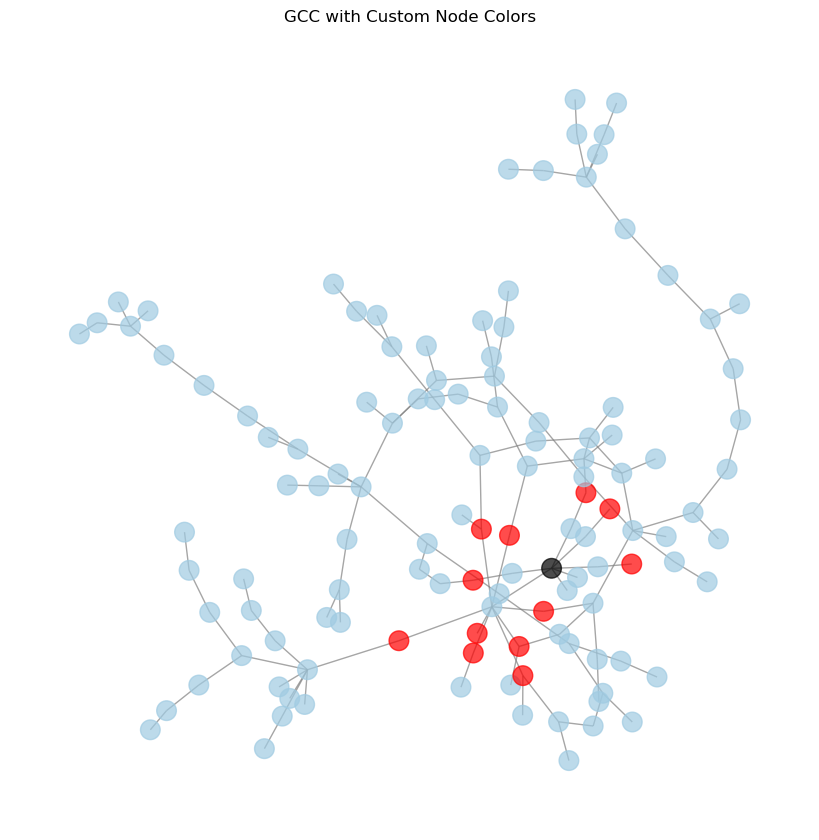

In [12]:

import random

# Creating the random network with 200 nodes and an average degree of 1.5
n = 200
avg_degree = 1.5
G = nx.erdos_renyi_graph(n, avg_degree / n)

# Finding all connected components as separate graphs
connected_components = list(nx.connected_components(G))

# Identify the Giant Connected Component (GCC)
gcc_nodes = max(connected_components, key=len)
gcc = G.subgraph(gcc_nodes)

# Choosing a random node from the GCC
random_node = random.choice(list(gcc.nodes()))

# Finding all nodes that are precisely 2 steps away from the random node
nodes_2_steps_away = [node for node, distance in nx.single_source_shortest_path_length(gcc, random_node).items() if distance == 2]

# Creating a custom node color mapping
node_colors = {node: "#000000" if node == random_node else ("#ff0000" if node in nodes_2_steps_away else "#A0CBE2") for node in gcc.nodes()}

# Drawing the GCC with custom node colors
pos = nx.spring_layout(gcc, seed=42)
plt.figure(figsize=(8, 8))
nx.draw(gcc, pos, node_size=200, node_color=list(node_colors.values()), edge_color='gray', alpha=0.7)
plt.title("GCC with Custom Node Colors")
plt.axis('off')
plt.show()


# Part 3: Watts-Strogatz Networks


**Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity  𝑝=0,0.1,and1
 . Calculate the average shortest path length  ⟨𝑑⟩
  for each one. Describe what happens to the network when  𝑝=1**

In [14]:


# our Parameters
n = 500  # Number of nodes
k = 4    # Average degree
p_values = [0, 0.1, 1]  # Rewiring probabilities

# Calculating average shortest path lengths for each network
for p in p_values:
    # Generating a Watts-Strogatz graph
    G = nx.watts_strogatz_graph(n, k, p)
    
    # Calculating the average shortest path length
    avg_shortest_path_length = nx.average_shortest_path_length(G)
    
    # Printing the result
    print(f"For p = {p}: Average Shortest Path Length ⟨𝑑⟩ = {avg_shortest_path_length:.4f}")


For p = 0: Average Shortest Path Length ⟨𝑑⟩ = 62.8758
For p = 0.1: Average Shortest Path Length ⟨𝑑⟩ = 8.0318
For p = 1: Average Shortest Path Length ⟨𝑑⟩ = 4.7684


As we can see, When 𝑝 = 1 (full rewiring), the network becomes a random graph, and the average shortest path length ⟨𝑑⟩ decreases significantly. In a fully rewired network, nodes are essentially connected randomly, resulting in shorter paths between nodes on average compared to the more ordered and structured networks with 𝑝 < 1.

**Let's understand the behavior of the WS model as we increase p in more detail.. Generate 50 networks with  𝑁=500
 ,  ⟨𝑘⟩=4
 , for each of  𝑝={0,0.01,0.03,0.05,0.1,0.2}
 . Calculate the average of  ⟨𝑑⟩
  as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot.**

C:\Users\an179\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 119889 (\N{MATHEMATICAL ITALIC SMALL D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


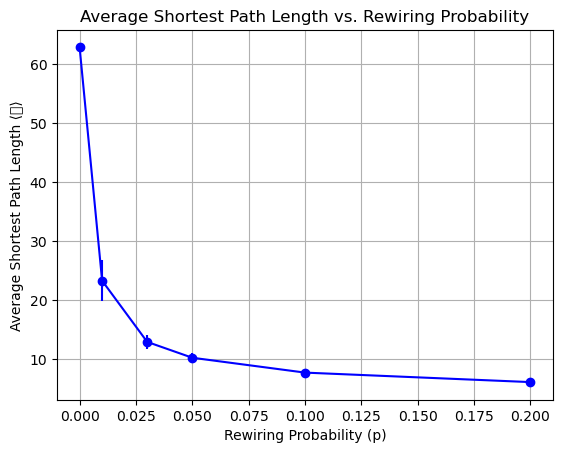

In [15]:


# Our Parameters
n = 500  # Number of nodes
avg_degree = 4  # Average degree
p_values = [0, 0.01, 0.03, 0.05, 0.1, 0.2]  # Rewiring probabilities
num_networks = 50  # Number of networks to generate for each 𝑝

# Lists to store average ⟨𝑑⟩ and standard deviation values
avg_d_values = []
std_d_values = []

# Generating networks and calculate average ⟨𝑑⟩ for each 𝑝
for p in p_values:
    avg_d_samples = []  # To store average ⟨𝑑⟩ values for each network
    
    for _ in range(num_networks):
        # Generate a Watts-Strogatz graph
        G = nx.watts_strogatz_graph(n, avg_degree, p)
        
        # Calculating the average shortest path length for this network
        avg_shortest_path_length = nx.average_shortest_path_length(G)
        avg_d_samples.append(avg_shortest_path_length)
    
    # Calculating the mean and standard deviation of ⟨𝑑⟩ for this 𝑝
    avg_d = np.mean(avg_d_samples)
    std_d = np.std(avg_d_samples)
    
    avg_d_values.append(avg_d)
    std_d_values.append(std_d)

# Creating a plot with error bars
plt.errorbar(p_values, avg_d_values, yerr=std_d_values, marker='o', linestyle='-', color='b')
plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Average Shortest Path Length ⟨𝑑⟩')
plt.title('Average Shortest Path Length vs. Rewiring Probability')
plt.grid(True)
plt.show()

# Part 4. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success

* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.

![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ba.png)

In [12]:
# Own BA model
def calculate_probabilities(unique_list, number_of_nodes):
    probabilities_dict = {}
    for element in unique_list:
        probabilities_dict[element] = G.degree(element) / (2 * len(G.edges()))
    return probabilities_dict

def add_edge(G, unique_list, probabilities_dict, new_edge):
    probabilities = [probabilities_dict[node] for node in unique_list]
    sum_of_probs = sum(probabilities)
    p = [prob / sum_of_probs for prob in probabilities]
    chosen_node = np.random.choice(unique_list, p=p)
    G.add_edge(chosen_node, new_edge)
    
G = nx.Graph()
G.add_edge(1, 2)

all_nodes = np.arange(3, 101)

for node in all_nodes:
    unique_list = list(G.nodes())
    prob_dict = calculate_probabilities(unique_list, node)
    add_edge(G, unique_list, prob_dict, node)

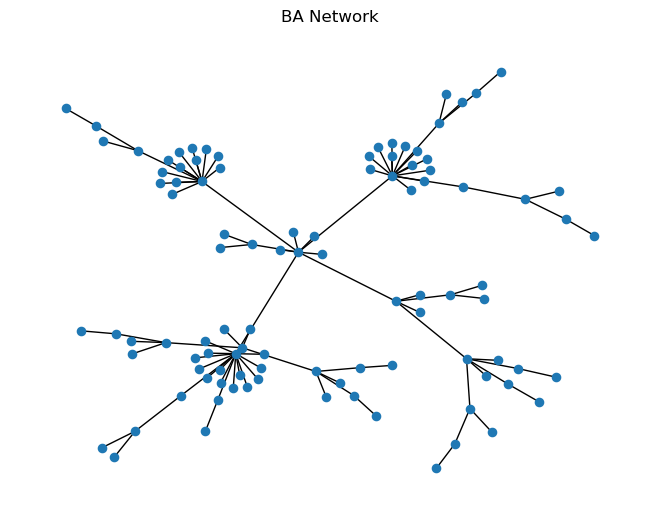

In [13]:
# Plot it using NetworkX
nx.draw(G, pos=nx.spring_layout(G), with_labels=False, node_size=35)
plt.title("BA Network")
plt.show()

* Now create a 5000 node network.
  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

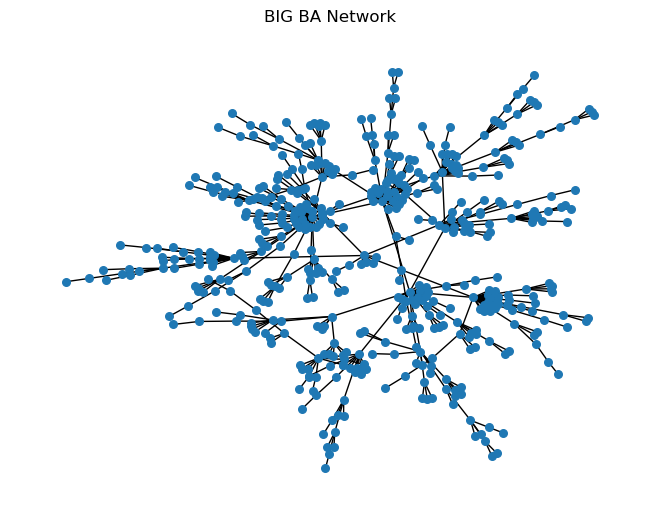

In [14]:
# 5000 node network 
# Plotting 5000 nodes is not possible with nx as following bug occures
# module 'scipy.sparse' has no attribute 'coo_array'

N = 499
G = nx.Graph()
G.add_edge(1, 2)

for node in range(3, N + 1):
    unique_list = list(G.nodes())
    prob_dict = calculate_probabilities(unique_list, node)
    add_edge(G, unique_list, prob_dict, node)
    
nx.draw(G, pos=nx.spring_layout(G), with_labels=False, node_size=30)
plt.title("BIG BA Network")
plt.show()

In [7]:
# Creating BA with nx
N = 5000
m = 1
G = nx.barabasi_albert_graph(N, m)

In [8]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

In [9]:
# What's the maximum and minimum degree?
max_degree = max(degree_sequence)
min_degree = min(degree_sequence)
print(f"Minimum degree is {min_degree} and maximum degree is {max_degree}.")

Minimum degree is 1 and maximum degree is 120.


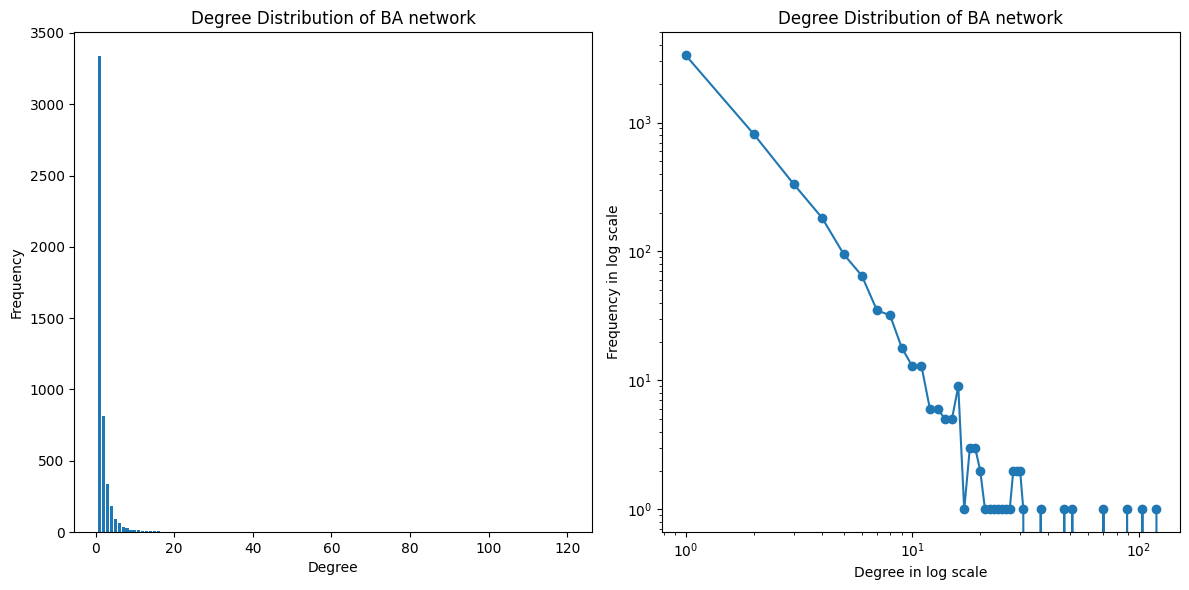

In [10]:
# Now, bin the degree distribution, for example using numpy.histogram
ba_hist, ba_edges = np.histogram(degree_sequence, bins=range(min_degree, max_degree + 2))


# Plot the distribution. Plot it with both linear and log-log axes.
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.bar(ba_edges[:-1], ba_hist)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of BA network')

plt.subplot(122)
plt.loglog(ba_edges[:-1], ba_hist, 'o-')
plt.xlabel('Degree in log scale')
plt.ylabel('Frequency in log scale')
plt.title('Degree Distribution of BA network')

plt.tight_layout()
plt.show()

# Part 5 Power-laws and the friendship paradox

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

* Pick a node _i_ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).
* Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.
* Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 

* Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.

In [5]:
# create BA network so you dont have to run whole notebook to check part 5
G = nx.barabasi_albert_graph(5000, 1)

count_paradox = 0

for _ in range(1000):

    # pick node i at random and calculate its degree
    i = random.choice(list(G.nodes()))
    degree_i = G.degree(i)

    # find i's neighbors and calculate average degree
    neighbors = list(G.neighbors(i))
    avg_degree_neighbors = np.mean([G.degree(neighbor) for neighbor in neighbors])
    
    #compate the two number to check if i's friends on average have more friends than i 
    if avg_degree_neighbors > degree_i:
        count_paradox += 1

print(f"The friendship paradox is true {count_paradox} out of 1000 times.")


The friendship paradox is true 844 out of 1000 times.


####  Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.

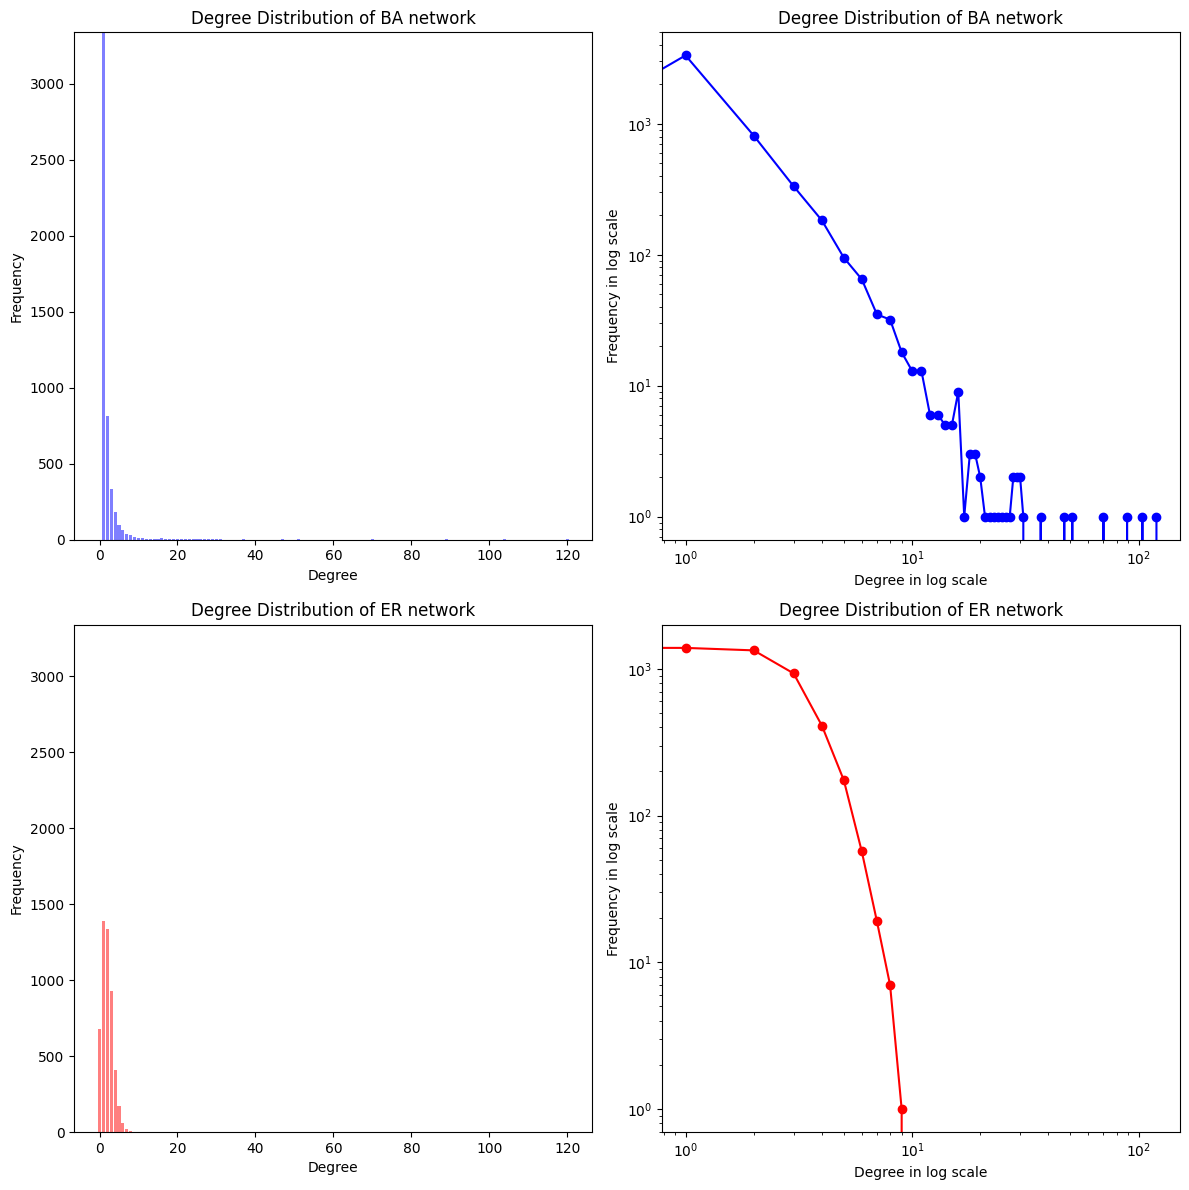

In [13]:
# Calculate average degree of BA graph
avg_degree_ba = np.mean([degree for node, degree in G.degree()])

# Calculate p for ER graph
p = avg_degree_ba / (len(G) - 1)

# Generate ER graph
G_er = nx.erdos_renyi_graph(5000, p)

# Compare degree distributions
degree_sequence_ba = [degree for node, degree in G.degree()]
degree_sequence_er = [degree for node, degree in G_er.degree()]

# Find the global minimum and maximum degrees between both graphs
min_degree = min(min(degree_sequence_ba), min(degree_sequence_er))
max_degree = max(max(degree_sequence_ba), max(degree_sequence_er))

# Use the same bin edges for both histograms
bins = range(min_degree, max_degree + 2)

# Bin the degree distribution for BA and ER graphs
ba_hist, ba_edges = np.histogram(degree_sequence_ba, bins=bins)
er_hist, er_edges = np.histogram(degree_sequence_er, bins=bins)

# Find the global maximum frequency to set the same y-axis limit for linear plots
max_freq = max(max(ba_hist), max(er_hist))

# Plot the distributions
plt.figure(figsize=(12, 12))

# BA Graph - Linear Scale
plt.subplot(221)
plt.bar(ba_edges[:-1], ba_hist, alpha=0.5, color='b')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of BA network')
plt.ylim(0, max_freq)  # Set the same y-axis limit

# BA Graph - Log-Log Scale
plt.subplot(222)
plt.loglog(ba_edges[:-1], ba_hist, 'o-', color='b')
plt.xlabel('Degree in log scale')
plt.ylabel('Frequency in log scale')
plt.title('Degree Distribution of BA network')

# ER Graph - Linear Scale
plt.subplot(223)
plt.bar(er_edges[:-1], er_hist, alpha=0.5, color='r')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of ER network')
plt.ylim(0, max_freq)  # Set the same y-axis limit

# ER Graph - Log-Log Scale
plt.subplot(224)
plt.loglog(er_edges[:-1], er_hist, 'o-', color='r')
plt.xlabel('Degree in log scale')
plt.ylabel('Frequency in log scale')
plt.title('Degree Distribution of ER network')

plt.tight_layout()
plt.show()

In [15]:
#Print Max and Min Degree for each Network
print(f"BA Graph - Max Degree: {max(degree_sequence_ba)}, Min Degree: {min(degree_sequence_ba)}")
print(f"ER Graph - Max Degree: {max(degree_sequence_er)}, Min Degree: {min(degree_sequence_er)}")

# Compare Number of Connected Components
num_connected_components_ba = nx.number_connected_components(G)
num_connected_components_er = nx.number_connected_components(G_er)

print(f"Number of connected components in BA Graph: {num_connected_components_ba}")
print(f"Number of connected components in ER Graph: {num_connected_components_er}")

BA Graph - Max Degree: 120, Min Degree: 1
ER Graph - Max Degree: 9, Min Degree: 0
Number of connected components in BA Graph: 1
Number of connected components in ER Graph: 825


As expected, degree distribution of BA Graph follows power law degree distribution while ER does not. With same parameters we can see that BA network has "super nodes" with very high degree (max is 120), while in ER such nodes does not exist (max degree is 9). 

Additionally, based on connected components analysis, we can observe that BA network tend to form one big component, while ER creates a lot of separated small networks (825) in this example. 

# Part 6 Configuration-model networks

Next, we will create configuration-model networks with degree distributions of our own choice. Follow the recipe below for success

* Extract the degree sequence for the 100-node Barabasi-Albert network you created in Part 4 above. Create the configuration-model network with an algorithm you have coded on your own and include this algorithm as part of your answer to this exercise (so don't use the built-in NetworkX function, but the one you created during week 3). 
* Plot the network using NetworkX. When you compare this network to your Barabasi-Albert network visually, what differences do you notice?
* Create a 5000-node configuration-model network, where half of the nodes have degree 3 and the other half have degree 5. Again, create the network using the function you coded in Week 3, and not using the NetworkX function.
* What should the sum of node degrees be if all nodes had degrees as described in the exercise?
* Calculate and print the sum of node degrees and plot the binned degree distribution nicely. If the node degrees are not exactly as described in the exercise (half having degree 3, the other half degree 5), explain what might have caused this difference in node degrees.

 ##### Extract the degree sequence for the 100-node Barabasi-Albert network you created in Part 4 above. Create the configuration-model network with an algorithm you have coded on your own and include this algorithm as part of your answer to this exercise (so don't use the built-in NetworkX function, but the one you created during week 3). 

In [16]:
# This cell is copied from part 4 so you dont have to run whole notebook to check part 6
# Own BA model
def calculate_probabilities(unique_list, number_of_nodes):
    probabilities_dict = {}
    for element in unique_list:
        probabilities_dict[element] = G.degree(element) / (2 * len(G.edges()))
    return probabilities_dict

def add_edge(G, unique_list, probabilities_dict, new_edge):
    probabilities = [probabilities_dict[node] for node in unique_list]
    sum_of_probs = sum(probabilities)
    p = [prob / sum_of_probs for prob in probabilities]
    chosen_node = np.random.choice(unique_list, p=p)
    G.add_edge(chosen_node, new_edge)
    
G_100_custom = nx.Graph()
G_100_custom.add_edge(1, 2)

all_nodes = np.arange(3, 101)

for node in all_nodes:
    unique_list = list(G_100_custom.nodes())
    prob_dict = calculate_probabilities(unique_list, node)
    add_edge(G_100_custom, unique_list, prob_dict, node)

In [19]:
# configuration model code from week 3 
def configuration_model(degrees):
    halfedges = []

    # STEP ONE: Append integer i to `halfedges` k times if the ith entry of degrees is equal to k.
    for i, k in enumerate(degrees):
        halfedges.extend([i] * k)

    # Shuffle the list halfedges
    # STEP TWO:
    np.random.shuffle(halfedges)

    edgelist = []

    # STEP THREE: Append the resulting edges to the list `edgelist` as tuples (i, j).
    for i in range(0, len(halfedges), 2):
        edgelist.append((halfedges[i], halfedges[i + 1]))

    return edgelist

In [21]:
# Extract the degree sequence from G_100_custom
degree_sequence_custom = [d for n, d in G_100_custom.degree()]

# Create the configuration-model network
edgelist = configuration_model(degree_sequence_custom)
G_cm_custom = nx.Graph(edgelist)

##### Plot the network using NetworkX. When you compare this network to your Barabasi-Albert network visually, what differences do you notice?


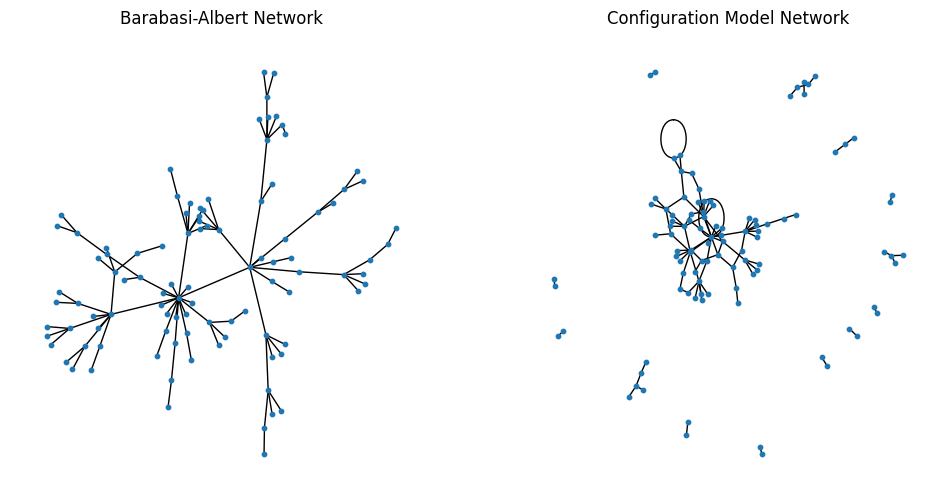

In [23]:
# Plot the Barabasi-Albert network
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
nx.draw(G_100_custom, with_labels=False, node_size=10, font_size=8)
plt.title('Barabasi-Albert Network')

# Plot the Configuration Model network
plt.subplot(1, 2, 2)
nx.draw(G_cm_custom, with_labels=False, node_size=10, font_size=8)
plt.title('Configuration Model Network')

plt.show()

They look different mostly becaause configuration model allowes self-loops or multiple edges between the same nodes. We can see that configuration model is not one connected commponent which is the case in BA network. 

##### Create a 5000-node configuration-model network, where half of the nodes have degree 3 and the other half have degree 5. Again, create the network using the function you coded in Week 3, and not using the NetworkX function.

In [26]:
# create degree sequence
degree_sequence_5000 = [3] * 2500 + [5] * 2500

#shuffle to ensure its random
np.random.shuffle(degree_sequence_5000)

# create network configuration model
edgelist_5000 = configuration_model(degree_sequence_5000)
G_cm_5000 = nx.Graph(edgelist_5000)

##### What should the sum of node degrees be if all nodes had degrees as described in the exercise?


In [29]:
# We can predict sum of node degrees using this formula
Sum = 2500 * 3 + 2500 * 5
print(f"Predicted sum of node degrees: {Sum}")

Predicted sum of node degrees: 20000


In [33]:
# Calculate the actual sum of network node degrees
actual_sum_degrees = sum(dict(G_cm_5000.degree()).values())
print(f"Sum of node degrees: {actual_sum_degrees}")



Sum of node degrees: 19994


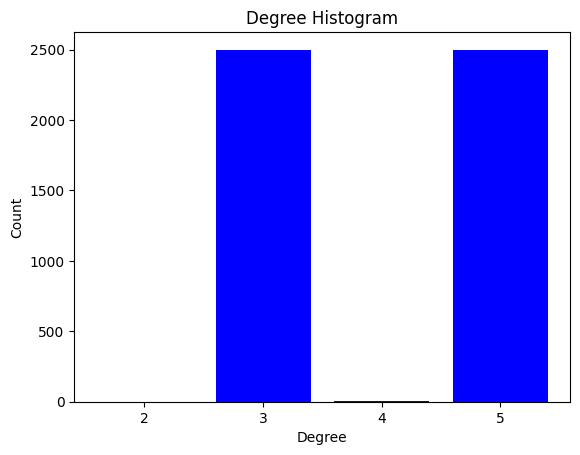

In [35]:
degree_counts = {}
for _, degree in G_cm_5000.degree():
    if degree in degree_counts:
        degree_counts[degree] += 1
    else:
        degree_counts[degree] = 1

degrees = list(degree_counts.keys())
counts = list(degree_counts.values())

plt.bar(degrees, counts, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xticks(sorted(degrees))
plt.show()

##### If the node degrees are not exactly as described in the exercise (half having degree 3, the other half degree 5), explain what might have caused this difference in node degrees.

Answer: 

Because we did not prevent self loops and multiple edges, some nodes can have multiple connections with other nodes which will result in lower number of degree even if number of connections is correct. In network we created difference in expected degree sum vs actual degree was 6.